### Import libraries and Read data

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path ="/content/sample_data/spotify-2023.csv"

In [ ]:
data = pd.read_csv(data_path, encoding='latin-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Brief description of the data set
---

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.


### Key Features

---



- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

###**Initial plan for data exploration**



---


*   Summary Statistics
*   Distribution Analysis
*   Categorical Attributes
*   Correlation Analysis
*   Pairwise Scatterplots
*   Visualization of Trends

###**Data Cleaning and Feature Engineering**

In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
data.shape

(953, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
data.drop(index=574,inplace=True)

In [ ]:
data["streams"] = pd.to_numeric(data["streams"])

In [ ]:
data['is_non_numeric'] = data.in_deezer_playlists.str.isnumeric()

In [ ]:
data.loc[data["is_non_numeric"]== False]["in_deezer_playlists"]

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object

In [ ]:
#try to remove ","
data["in_deezer_playlists"]=data["in_deezer_playlists"].str.replace(",","" )

In [ ]:
data.loc[data["is_non_numeric"]== False]["in_deezer_playlists"]

48     2445
54     3394
55     3421
65     4053
73     1056
       ... 
761    2453
762    2430
871    6720
893    1315
910    7827
Name: in_deezer_playlists, Length: 79, dtype: object

In [ ]:
data["in_deezer_playlists"]=pd.to_numeric (data["in_deezer_playlists"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [ ]:
#do the same for in_shazam_charts
data.loc[data["is_non_numeric"]== False]["in_shazam_charts"]


48     140
54     NaN
55     NaN
65       0
73     NaN
      ... 
761     84
762     36
871     99
893      2
910      0
Name: in_shazam_charts, Length: 79, dtype: object

In [ ]:
data["in_shazam_charts"]=data["in_shazam_charts"].str.replace(",","" )

In [ ]:
data["in_shazam_charts"] =pd.to_numeric(data["in_shazam_charts"])

In [ ]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
is_non_numeric           0
dtype: int64

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
is_non_numeric          0
dtype: int64

In [ ]:
data.drop('is_non_numeric',axis="columns",inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      952 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   9

In [ ]:
data =data.drop_duplicates()

In [ ]:
data['mode'].value_counts()

Major    549
Minor    403
Name: mode, dtype: int64

In [ ]:
data['mode']=data['mode'].map({
    'Major': 1,
     'Minor': 0
})

In [ ]:
data['artist(s)_name']

0        Latto, Jung Kook
1             Myke Towers
2          Olivia Rodrigo
3            Taylor Swift
4               Bad Bunny
              ...        
948          Selena Gomez
949          Taylor Swift
950    Feid, Paulo Londra
951    Feid, Sech, Jhayco
952             Burna Boy
Name: artist(s)_name, Length: 952, dtype: object

In [ ]:
#Split artist_count into a list
data['artist(s)_name'] = data['artist(s)_name'].str.split(',')

In [ ]:
data.shape

(952, 24)

### **Data Analysis**

In [ ]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,...,56.907563,122.553571,0.576681,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,...,157.513706,28.069601,0.494345,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,...,0.000000,65.000000,0.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,...,0.000000,99.750000,0.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,...,2.000000,121.000000,1.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,...,33.250000,140.250000,1.000000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,...,1451.000000,206.000000,1.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<Axes: xlabel='artist_count', ylabel='Count'>

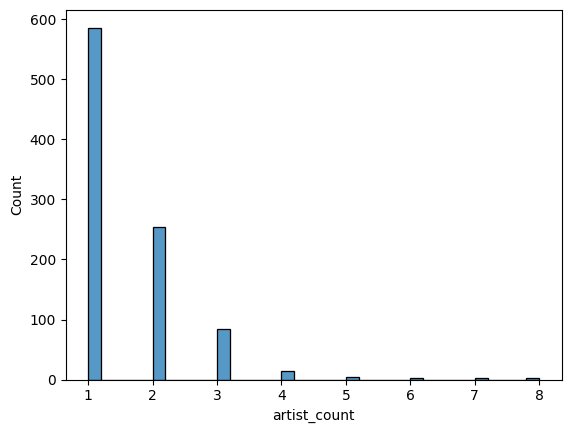

In [ ]:
sns.histplot(data=data, x="artist_count")

<Axes: xlabel='streams', ylabel='Count'>

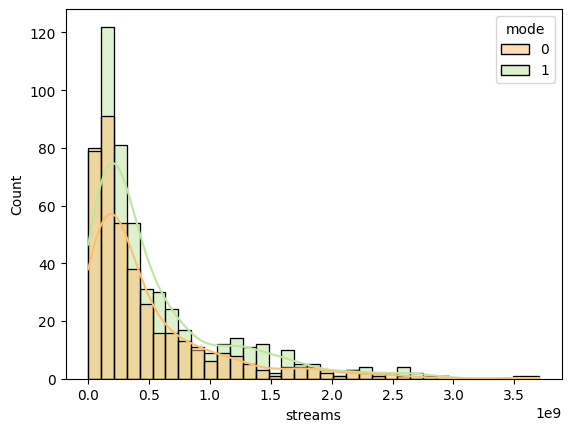

In [ ]:
sns.histplot(data=data, palette = "Spectral", x="streams", hue = 'mode',kde = True)

<Axes: xlabel='bpm', ylabel='Count'>

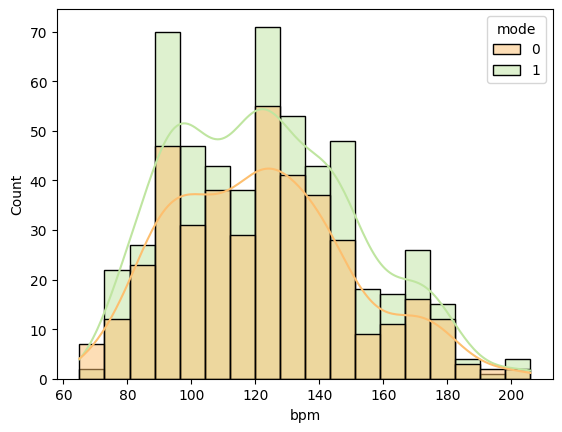

In [ ]:
sns.histplot(data=data, x="bpm",palette = "Spectral",  hue = 'mode',kde = True)

In [ ]:
data["mode"].value_counts()

1    549
0    403
Name: mode, dtype: int64

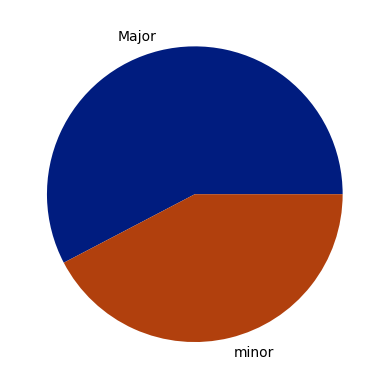

In [ ]:
colors = sns.color_palette('dark')
plt.pie(data["mode"].value_counts(), labels = ["Major","minor"], colors = colors)
plt.show()

In [ ]:
key_data=pd.DataFrame(data["key"].value_counts())
key_data

,key
C#,120
G,96
0,95
G#,91
F,89
B,81
D,81
A,74
F#,73
E,62


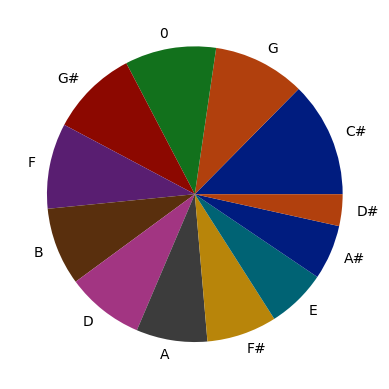

In [ ]:
colors = sns.color_palette('dark')
plt.pie(key_data.key, labels =key_data.index, colors = colors)
plt.show()

In [ ]:
# Group the data by 'released_year' and calculate the mean of 'streams' for each year
yearly_streams = data.groupby('released_year')['streams'].mean()
yearly_streams.head()

released_year
1930     90598517.0
1942    395591396.0
1946    389771964.0
1950    473248298.0
1952    395591396.0
Name: streams, dtype: float64

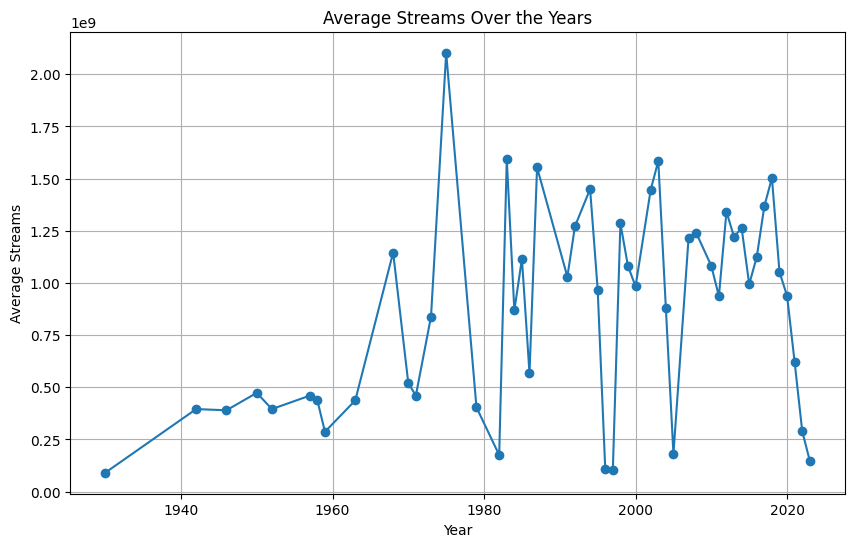

In [ ]:
# Create a line chart to visualize how 'streams' change over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_streams.index, yearly_streams.values, marker='o', linestyle='-')
plt.title('Average Streams Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Streams')
plt.grid(True)
plt.show()

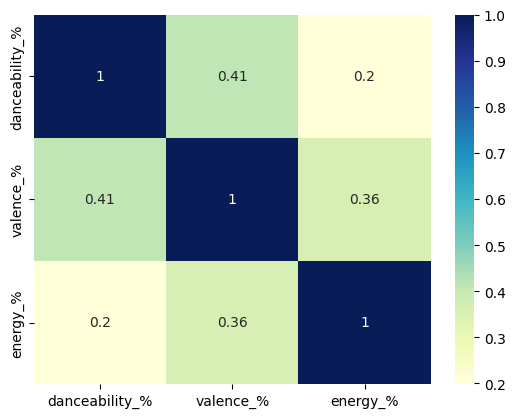

<Figure size 2000x1000 with 0 Axes>

In [ ]:
dataplot = sns.heatmap(data[['danceability_%', 'valence_%','energy_%']].corr(), cmap="YlGnBu", annot=True)
plt.figure(figsize=(20, 10))
plt.show()

 ### **Hypothesis**

Hypothesis 1 :

Null Hypothesis (H0): The danceability of songs released in major keys is the same as the danceability of songs released in minor keys.

Alternative Hypothesis (Ha): The danceability of songs released in major keys is different from the danceability of songs released in minor keys.

In [ ]:
danceability_major =data.loc[data['mode']==1]['danceability_%']
danceability_minor =data.loc[data['mode']==0]['danceability_%']
_, p_value = mannwhitneyu(danceability_major.sample(200), danceability_minor.sample(200), alternative='two-sided')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in danceability between major and minor key songs.")
else:
    print("Fail to reject the null hypothesis: No significant difference observed in danceability.")

Reject the null hypothesis: There is a significant difference in danceability between major and minor key songs.


Hypothesis 2:

Null Hypothesis (H0): The mean acousticness of songs included in Spotify playlists is the same as the mean acousticness of songs not included in Spotify playlists.

Alternative Hypothesis (Ha): The mean acousticness of songs included in Spotify playlists is different from the mean acousticness of songs not included in Spotify playlists.

Hypothesis 3:

Null Hypothesis (H0): The mean energy level of songs in major keys is the same as the mean energy level of songs in minor keys.

Alternative Hypothesis (Ha): The mean energy level of songs in major keys is different from the mean energy level of songs in minor keys.

###**Future Steps**
 Building predictive models, conducting further hypothesis tests, or exploring additional data sources that can enhance my understanding of the music industry or user behavior.





### summarizes the quality of this data set

Some of the data was not very clean so had to do some feature engineering but it is insightful.